<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files

uploaded = files.upload()

Saving insurance charges.csv to insurance charges.csv


In [8]:
# Loading the Uploaded Dataset
import pandas as pd

df = pd.read_csv("insurance charges.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
# Inspecting the Dataset Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
# Checking for Missing Values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [11]:
# Summary Statistics - Continuous Variables
df[['age', 'bmi', 'charges']].describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


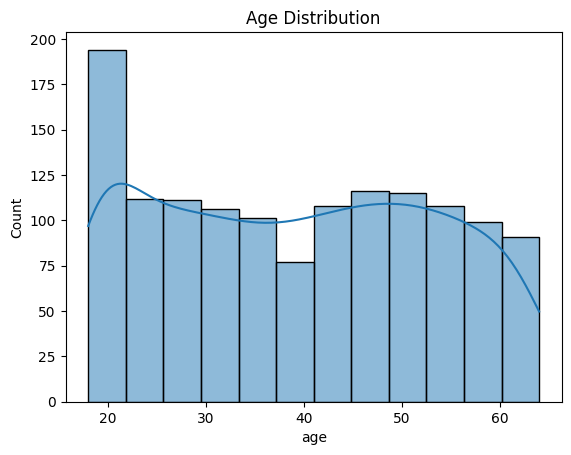

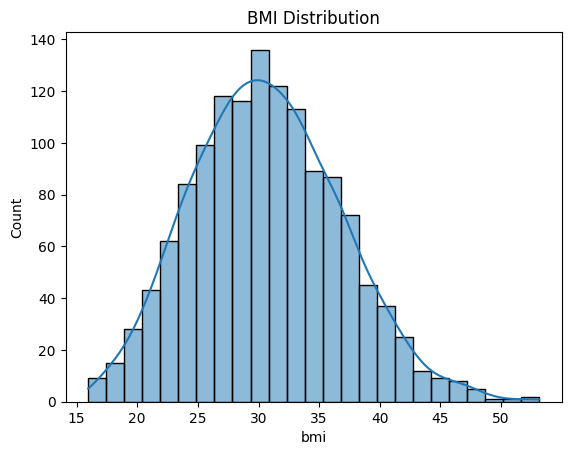

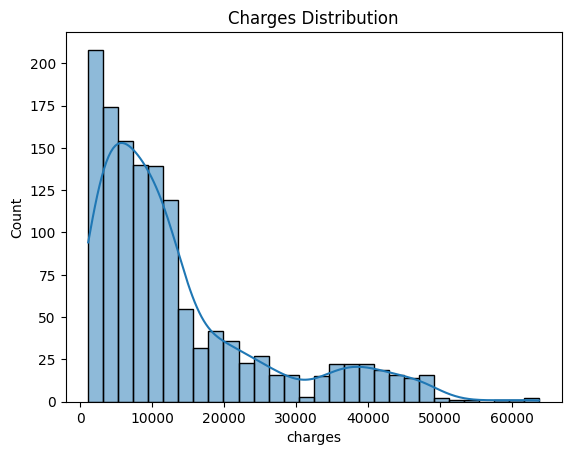

In [12]:
# Visualizing Distributions
plt.figure()
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure()
sns.histplot(df['bmi'], kde=True)
plt.title("BMI Distribution")
plt.show()

plt.figure()
sns.histplot(df['charges'], kde=True)
plt.title("Charges Distribution")
plt.show()

In [13]:
# Creating Target Variable - high_charge
df['high_charge'] = np.where(df['charges'] > 16000, 1, 0)
df[['charges', 'high_charge']].head()

,charges,high_charge
0,16884.92400,1
1,1725.55230,0
2,4449.46200,0
3,21984.47061,1
4,3866.85520,0


In [14]:
# Encoding Categorical Variables
df_encoded = pd.get_dummies(
    df,
    columns=['sex', 'smoker', 'region'],
    drop_first=True
)

df_encoded.head()

,age,bmi,children,charges,high_charge,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,False,True,False,False,True
1,18,33.770,1,1725.55230,0,True,False,False,True,False
2,28,33.000,3,4449.46200,0,True,False,False,True,False
3,33,22.705,0,21984.47061,1,True,False,True,False,False
4,32,28.880,0,3866.85520,0,True,False,True,False,False


In [15]:
# Defining Features and Target
X = df_encoded.drop(['charges', 'high_charge'], axis=1)
y = df_encoded['high_charge']

In [16]:
# Train/Test Split (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [18]:
# Training Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [19]:
# Predictions
y_pred = gnb.predict(X_test)
y_prob = gnb.predict_proba(X_test)[:, 1]

In [20]:
# Model Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9353233830845771
Precision: 0.9642857142857143
Recall: 0.7788461538461539
F1 Score: 0.8617021276595744


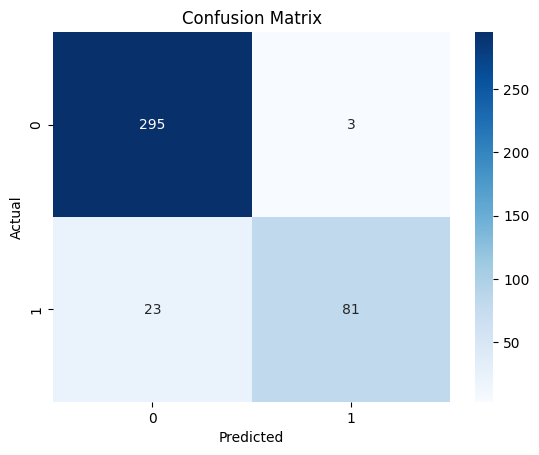

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

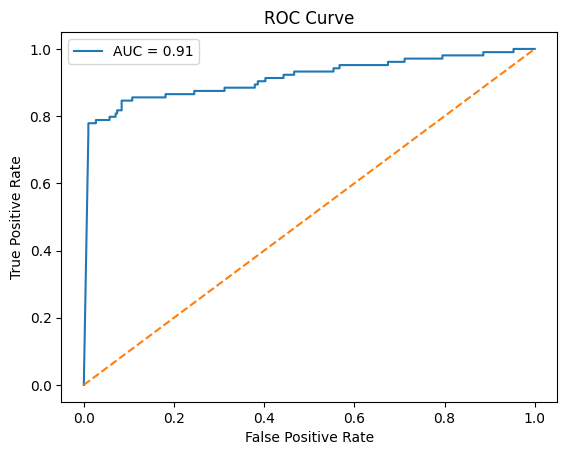

In [22]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [23]:
# Featuring Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Training Gaussian Naive Bayes With Scaling
gnb_scaled = GaussianNB()
gnb_scaled.fit(X_train_scaled, y_train)

GaussianNB()

In [25]:
# Predictions After Scaling
y_pred_scaled = gnb_scaled.predict(X_test_scaled)

In [26]:
# Evaluation After Scaling
print("Accuracy (Scaled):", accuracy_score(y_test, y_pred_scaled))
print("Precision (Scaled):", precision_score(y_test, y_pred_scaled))
print("Recall (Scaled):", recall_score(y_test, y_pred_scaled))
print("F1 Score (Scaled):", f1_score(y_test, y_pred_scaled))

Accuracy (Scaled): 0.9353233830845771
Precision (Scaled): 0.9642857142857143
Recall (Scaled): 0.7788461538461539
F1 Score (Scaled): 0.8617021276595744
